# TODO:
- use scikit learn data for (X,Y)
- learn logisitic regression model h
- for m0 and m1, suppose we have the simple setting where loss is 0 and 1 depending on Y
- only variable we can control is I~Ber(p), how many experts from a particular expert group exists

Toy datasets: https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Data

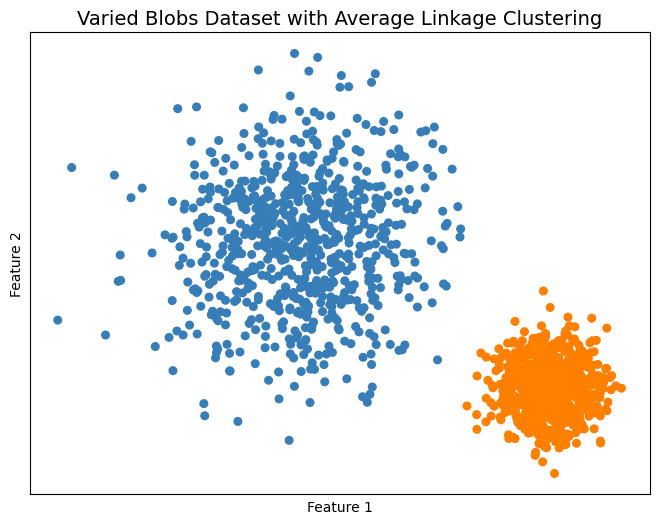

In [52]:
# Varied blobs dataset
n_samples = 1500
varied = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=[1.0, 2.5], random_state=123)

X, y = varied # y binary 0,1

# Normalize the dataset (from scikit learn website)
X_normalized = StandardScaler().fit_transform(X)

# Agglomerative Clustering object with Average Linkage (from scikit learn website)
n_clusters = 2  # Number of clusters
average_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

# Fit data and cluster
cluster_labels = average_clustering.fit_predict(X_normalized)

# Visualize clusters
plt.figure(figsize=(8, 6))

# Plot cluster
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors[cluster_labels])

plt.title('Varied Blobs Dataset with Average Linkage Clustering', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xticks(())
plt.yticks(())

plt.show()


In [54]:
np.unique(y)

array([0, 1])

In [73]:
pd.Series(y).value_counts()

1    750
0    750
Name: count, dtype: int64

# Logistic Regression Model

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=456)

# Model
h = LogisticRegression(max_iter=1000)

# Train
h.fit(X_train, y_train)

# Predict
y_pred = h.predict(X_test)


In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


# Simple setting where loss is 0 and 1 depending on Y

- the toy dataset consists of x and y
- above is the logistic regression with predictions from the classifier
- need to get expert 1's predictions and calculate loss
- need to get expert 2's predictions and calculate loss
- mix of experts loss?
- need to determine when to defer to expert or not (0,1)
- Expected loss?

- How h,r,m vary

In [133]:
def classifier_loss(y_truth, classifer_pred):
    return(np.abs(y_truth - classifer_pred))

In [134]:
def expert_loss(y_truth, expert_pred, r):
    return r * expert_pred + (1 - r) * y_truth

# weighted combination of the expert's prediction and the true label, based on the decision of the rejector
# r == 1, use expert's prediction

In [147]:
#y_test = np.random.randint(0, 2, size=450)
expert1_pred = np.random.randint(0, 2, size=450)
expert2_pred = np.random.randint(0, 2, size=450)

rejector = np.random.randint(0, 2, size=450) # defer or not

In [154]:
loss_classifier = classifier_loss(y_test, y_pred)
loss_expert1 = expert_loss(y_test, expert1_pred, rejector)
loss_expert2 = expert_loss(y_test, expert2_pred, rejector)

In [155]:
loss_expert_combined = (loss_expert1 + loss_expert2)/2

In [156]:
E_loss_expert1 = np.mean(loss_classifier * (rejector == 0) + loss_expert1 * (rejector == 1))
E_loss_expert1

0.24888888888888888

In [157]:
E_loss_expert2 = np.mean(loss_classifier * (rejector == 0) + loss_expert2 * (rejector == 1))
E_loss_expert2

0.25555555555555554

In [158]:
E_loss_combined = np.mean(loss_classifier * (rejector == 0) + loss_expert_combined * (rejector == 1))
E_loss_combined

0.25222222222222224

In [161]:
expert1 = []
expert2 = []
expert_combine = []

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3)
    h = LogisticRegression()
    h.fit(X_train, y_train)
    y_pred = h.predict(X_test)

    expert1_pred = np.random.randint(0, 2, size=450)
    expert2_pred = np.random.randint(0, 2, size=450)

    rejector = np.random.randint(0, 2, size=450)

    loss_classifier = classifier_loss(y_test, y_pred)
    loss_expert1 = expert_loss(y_test, expert1_pred, rejector)
    loss_expert2 = expert_loss(y_test, expert2_pred, rejector)
    loss_expert_combined = (loss_expert1 + loss_expert2)/2

    E_loss_expert1 = np.mean(loss_classifier * (rejector == 0) + loss_expert1 * (rejector == 1))
    E_loss_expert2 = np.mean(loss_classifier * (rejector == 0) + loss_expert2 * (rejector == 1))
    E_loss_combined = np.mean(loss_classifier * (rejector == 0) + loss_expert_combined * (rejector == 1))

    expert1.append(E_loss_expert1)
    expert2.append(E_loss_expert2)
    expert_combine.append(E_loss_combined)
